## Logistic Regression

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

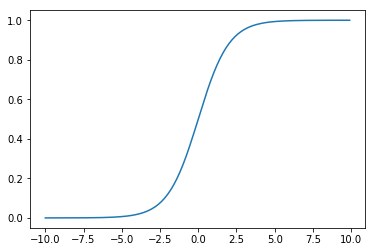

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

Logistic Regression就是用线性模型处理分类问题的方法

为什么不能直接用linera regression？

In [26]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data)
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
breast_cancer.target[:5]

array([0, 0, 0, 0, 0])

尝试用linear regression处理分类问题

In [43]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(breast_cancer.data[:,2].reshape(-1,1),breast_cancer.target,test_size = 0.2,random_state = 33)

In [44]:
#这个例子是错误的！

from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X,train_y) 

lineR.score(test_X,test_y)

0.49655703498691683

上面的例子是错误的，我们要预测的结果是类别，也就是0或者1，而不是一个介于其间的变量

对上面的例子做出一些改动

In [45]:
from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X,train_y) 

pred_y = lineR.predict(test_X)

acc = 0
for i in range(len(test_y)):
    if(pred_y[i]<0.5):
        if(test_y[i]==0):
            acc += 1
    else:
        if(test_y[i]==1):
            acc += 1
print("acc: " + str(acc/len(test_y)))

acc: 0.8508771929824561


使用logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(train_X,train_y) 

LogR.score(test_X,test_y)

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8596491228070176

看起来好像可以？

为什么一定要用losgistic regression？

数据的分布更重要!

In [55]:
X = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

train_X,test_X,train_y,test_y = train_test_split(X.reshape(-1,1),y,test_size = 0.2,random_state = 33)

先用linear regression试试

In [56]:
from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X,train_y) 

pred_y = lineR.predict(test_X)

acc = 0
for i in range(len(test_y)):
    if(pred_y[i]<0.5):
        if(test_y[i]==0):
            acc += 1
    else:
        if(test_y[i]==1):
            acc += 1
print("acc: " + str(acc/len(test_y)))

acc: 1.0


再用logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression  
logR = LogisticRegression()
logR.fit(train_X,train_y) 

logR.score(test_X,test_y)

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [75]:
X = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,100])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

train_X,test_X,train_y,test_y = train_test_split(X.reshape(-1,1),y,test_size = 0.2,random_state = 33)

In [76]:
from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X,train_y) 

pred_y = lineR.predict(test_X)

acc = 0
for i in range(len(test_y)):
    if(pred_y[i]<0.5):
        if(test_y[i]==0):
            acc += 1
    else:
        if(test_y[i]==1):
            acc += 1
print("acc: " + str(acc/len(test_y)))

acc: 0.5


In [62]:
from sklearn.linear_model import LogisticRegression  
logR = LogisticRegression()
logR.fit(train_X,train_y) 

logR.score(test_X,test_y)

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

为什么只加入了一个扰动，linear regression的表现变得这么糟糕?

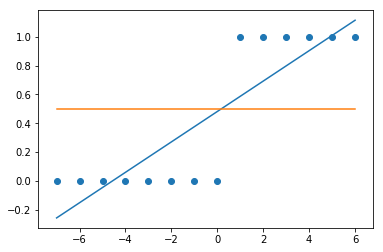

In [85]:
X = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1])

lineR = LinearRegression()
lineR.fit(X.reshape(-1,1),y) 

draw_X = np.array([-7,6]).reshape(-1,1)
draw_y = lineR.predict(draw_X)

plt.plot(draw_X,draw_y)
plt.plot([-7,6],[0.5,0.5])
plt.scatter(X,y)
plt.show()

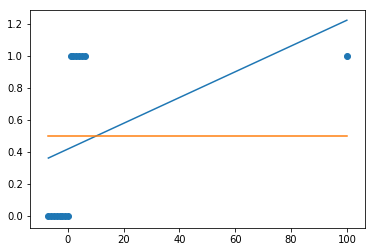

In [87]:
X = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,100])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

lineR = LinearRegression()
lineR.fit(X.reshape(-1,1),y) 

draw_X = np.array([-7,100]).reshape(-1,1)
draw_y = lineR.predict(draw_X)

plt.plot(draw_X,draw_y)
plt.plot([-7,100],[0.5,0.5])
plt.scatter(X,y)
plt.show()

如果用logistic regression呢？

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


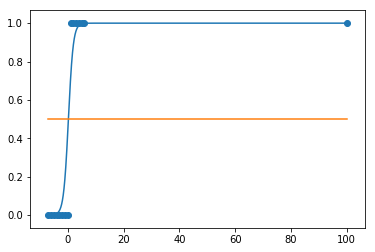

In [106]:
X = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,100])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

logR = LogisticRegression()
logR.fit(X.reshape(-1,1),y)

k = logR.coef_     #斜率
b = logR.intercept_        #截距
draw_X = np.linspace(-7,100,10000).reshape(-1,1)
draw_y = sigmoid(k*draw_X + b)

plt.plot(draw_X,draw_y)
plt.plot([-7,100],[0.5,0.5])
plt.scatter(X,y)
plt.show()

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


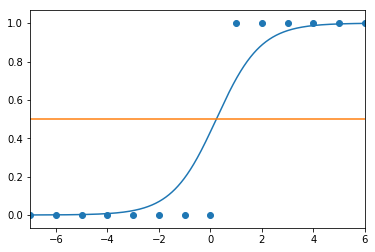

In [108]:
X = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,100])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

logR = LogisticRegression()
logR.fit(X.reshape(-1,1),y)


k = logR.coef_     #斜率
b = logR.intercept_        #截距
draw_X = np.linspace(-7,100,10000).reshape(-1,1)
draw_y = sigmoid(k*draw_X + b)

plt.plot(draw_X,draw_y)
plt.plot([-7,100],[0.5,0.5])
plt.xlim((-7,6))
plt.scatter(X,y)
plt.show()